# **CREDIT CARD FRAUD DETECTION**

### **Objective : The key objective of any credit card fraud detection system is to identify suspicious events and report them to an analyst while letting normal transactions be automatically processed**

### DOMAIN : FINANCE AND INSURANCE
    
**DONE BY : <br>William Johnson
<br>Sulala Saleem P
<br>Neha Johnson
<br>Leann Davis
<br>Akshaya CV**

# Importing the libraries

In [1]:
# Importing necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

# Loading the Data-set

In [2]:
# Reading dataset

data=pd.read_csv(r'C:\Users\User\Desktop\Norka_final_project\creditcard.csv')

In [3]:
# Displaying first few rows

data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0


# 1. DATA UNDERSTANDING

### Data information

In [4]:
# Concise summary of dataset

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284418 non-null  float64
 4   V4      284418 non-null  float64
 5   V5      284418 non-null  float64
 6   V6      284418 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     283953 non-null  float64
 14  V14     283953 non-null  float64
 15  V15     283953 non-null  float64
 16  V16     283953 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [5]:
# Checking for null values

data.isnull().sum()

Time        0
V1          0
V2          0
V3        389
V4        389
V5        389
V6        389
V7          0
V8          0
V9          0
V10         0
V11         0
V12         0
V13       854
V14       854
V15       854
V16       854
V17         0
V18         0
V19         0
V20         0
V21         0
V22         0
V23         0
V24         0
V25         0
V26         0
V27         0
V28         0
Amount      0
Class     244
dtype: int64

**Observation** : <br>
It is observed that there are null values present in the datset

In [6]:
# Checking the shape of the dataset

data.shape

(284807, 31)

**Observation** : <br>
It is observed that there are 284807 rows and 31 columns

In [7]:
# Statistical summary of dataset

data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,284418.000000,284418.000000,284418.000000,284418.000000,284807.000000,284807.000000,284807.000000,...,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284563.000000
mean,94813.859575,1.758702e-12,-8.252296e-13,0.000937,0.000335,-0.000330,0.000028,0.000260,-0.000375,0.000252,...,-0.000098,0.000094,0.000061,0.000043,-0.000086,-0.000032,0.000008,0.063870,88.285748,0.001729
std,47488.145955,1.958696e+00,1.651309e+00,1.516295,1.415815,1.380434,1.332074,1.236988,1.194468,1.098494,...,0.734595,0.725610,0.624545,0.605571,0.521301,0.482066,0.403615,5.114061,250.090588,0.041545
min,0.000000,-5.640751e+01,-7.271573e+01,-48.325589,-5.683171,-113.743307,-26.160506,-43.557242,-73.216718,-13.434066,...,-34.830382,-10.933144,-44.807735,-2.836627,-10.295397,-2.604551,-22.565679,-15.430084,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-0.889041,-0.848412,-0.691832,-0.768080,-0.553621,-0.208968,-0.642697,...,-0.228509,-0.541975,-0.161881,-0.354470,-0.317257,-0.326854,-0.070824,-0.052931,5.510000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,0.180931,-0.019425,-0.054593,-0.273691,0.040244,0.022190,-0.051239,...,-0.029441,0.006775,-0.011112,0.040985,0.016341,-0.051824,0.001401,0.011292,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027881,0.743942,0.611520,0.398572,0.570490,0.327306,0.597341,...,0.186474,0.528403,0.147875,0.439530,0.350634,0.240707,0.091042,0.078591,77.045000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558,16.875344,34.801666,73.301626,120.589494,20.007208,15.594995,...,27.202839,10.503090,22.528412,4.584549,7.519589,3.517346,31.612198,1126.960000,25691.160000,1.000000


In [8]:
# Displaying column names

data.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

**Observation** : <br>
So these are the columns in the dataset

### <b>FRAUD CASES AND GENUINE CASES

In [9]:
# Checking the number of fraud cases

fraud_cases=len(data[data['Class']==1])

In [10]:
print(' Number of Fraud Cases:',fraud_cases)

 Number of Fraud Cases: 492


In [11]:
# Checking the number of non-fraud cases

non_fraud_cases=len(data[data['Class']==0])

In [12]:
print('Number of Non Fraud Cases:',non_fraud_cases)

Number of Non Fraud Cases: 284071


**Observation** : <br>
So there are 492 fraud cases and 284071 non fraud cases

# Exploratory data analysis

### Univariate Analysis

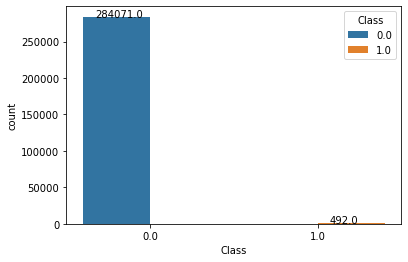

In [13]:
# Using barplot to check the number of fraudulent and non-fraudulent cases

fig = sns.countplot(x=data.Class, hue=data.Class)

for p in fig.patches:
    fig.annotate(p.get_height() , (p.get_x()+0.07, p.get_height()-40))

**Observation** :<br>
So from this countplot it is observed that the data is highly imbalanced. Only 492 out of 284807 are fraud.

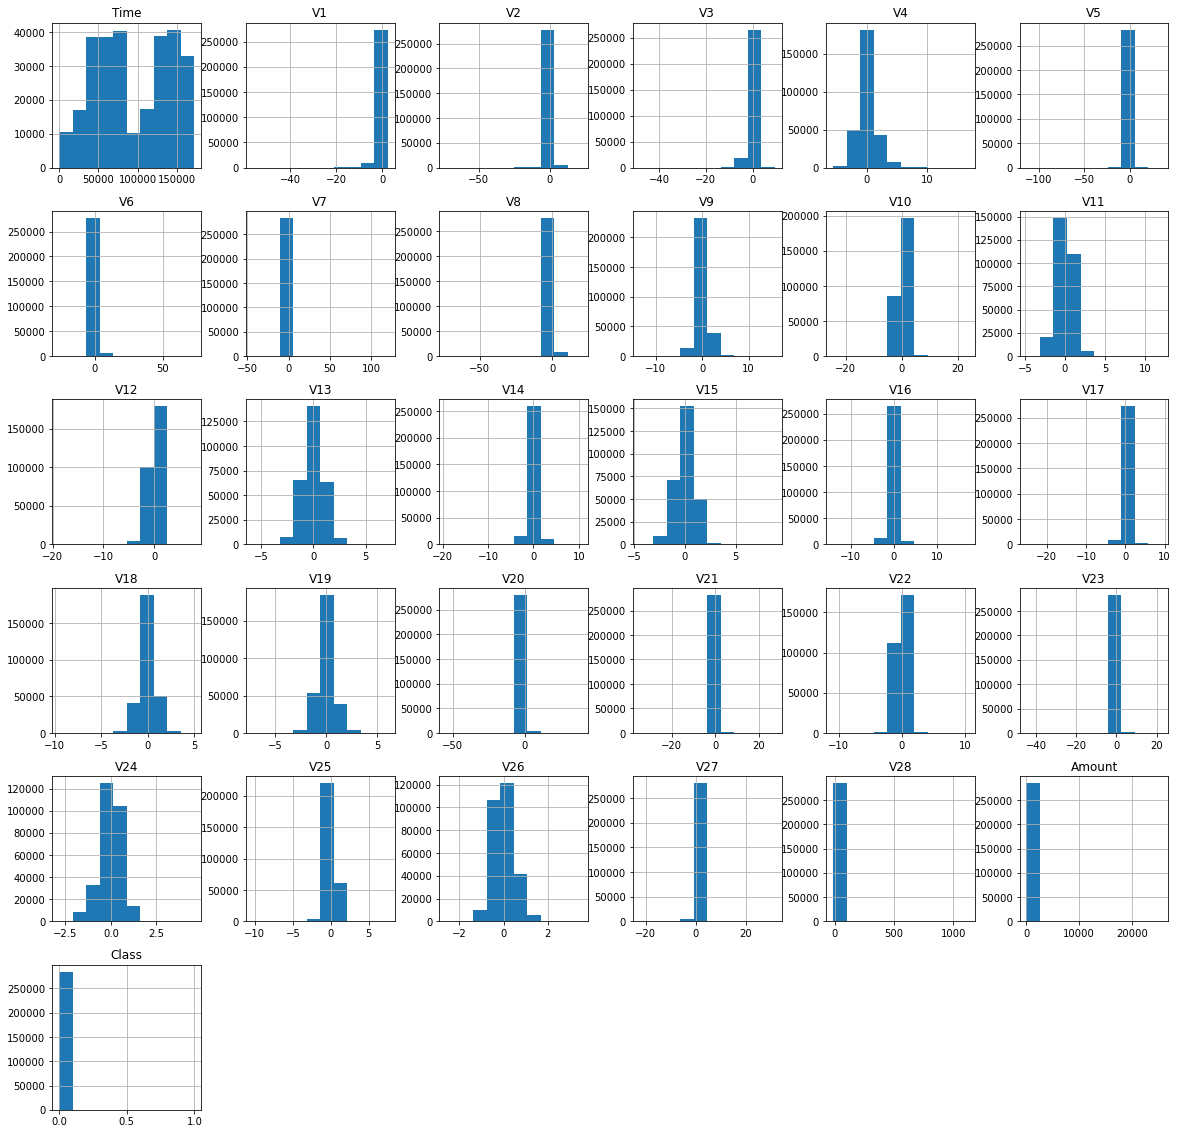

In [14]:
# Using histplots to check the distribution of the dataset

data.hist(figsize=(20,20))
plt.show()

<b>Observation</b><br>
The values of V1, V2,..., V28 are mostly grouped around 0 values, with some fairly large outliers or no exceptions.In Class the value 1 is very small (fraudulent transaction).

Time        AxesSubplot(0.125,0.787927;0.0945122x0.0920732)
V1        AxesSubplot(0.238415,0.787927;0.0945122x0.0920...
V2        AxesSubplot(0.351829,0.787927;0.0945122x0.0920...
V3        AxesSubplot(0.465244,0.787927;0.0945122x0.0920...
V4        AxesSubplot(0.578659,0.787927;0.0945122x0.0920...
V5        AxesSubplot(0.692073,0.787927;0.0945122x0.0920...
V6        AxesSubplot(0.805488,0.787927;0.0945122x0.0920...
V7          AxesSubplot(0.125,0.677439;0.0945122x0.0920732)
V8        AxesSubplot(0.238415,0.677439;0.0945122x0.0920...
V9        AxesSubplot(0.351829,0.677439;0.0945122x0.0920...
V10       AxesSubplot(0.465244,0.677439;0.0945122x0.0920...
V11       AxesSubplot(0.578659,0.677439;0.0945122x0.0920...
V12       AxesSubplot(0.692073,0.677439;0.0945122x0.0920...
V13       AxesSubplot(0.805488,0.677439;0.0945122x0.0920...
V14         AxesSubplot(0.125,0.566951;0.0945122x0.0920732)
V15       AxesSubplot(0.238415,0.566951;0.0945122x0.0920...
V16       AxesSubplot(0.351829,0.566951;

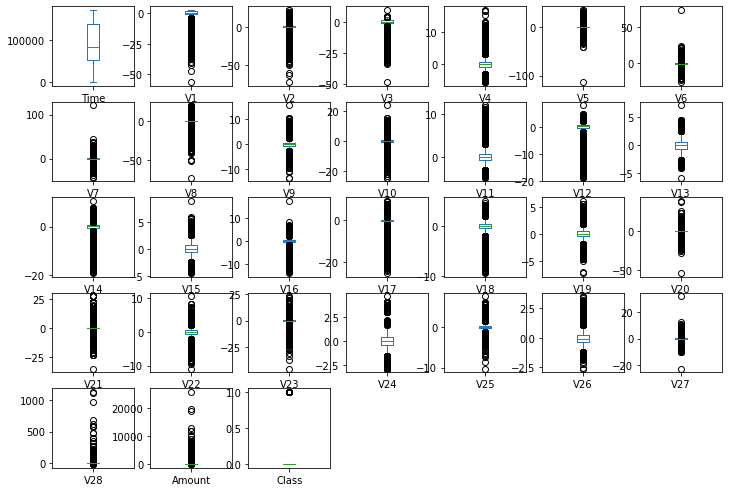

In [15]:
# Checking for outliers

data.plot(kind='box',subplots=True,figsize=(12,12),layout=(7,7))

**Observation** : <br>
We can see that there are outliers present in almost all the features

In [16]:
# Creating fraudulent dataframe
data_fraud = data[data['Class'] == 1]

# Creating non fraudulent dataframe
data_non_fraud = data[data['Class'] == 0]

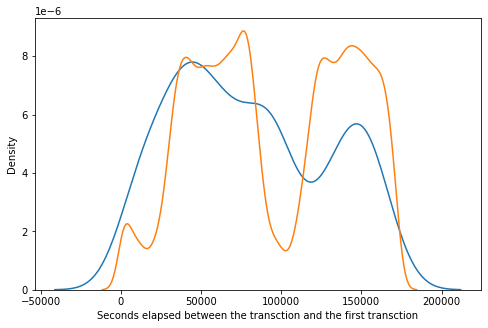

In [17]:
# Distribution plot

plt.figure(figsize=(8,5))
ax = sns.distplot(data_fraud['Time'],label='fraudulent',hist=False)
ax = sns.distplot(data_non_fraud['Time'],label='non fraudulent',hist=False)
ax.set(xlabel='Seconds elapsed between the transction and the first transction')
plt.show()

<b>Observation</b><br>
There is no specific pattern for the fraudulent and non-fraudulent transctions with respect to Time.

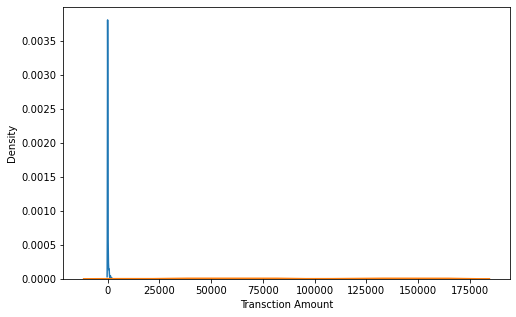

In [18]:
# Distribution plot

plt.figure(figsize=(8,5))
ax = sns.distplot(data_fraud['Amount'],label='fraudulent',hist=False)
ax = sns.distplot(data_non_fraud['Time'],label='non fraudulent',hist=False)
ax.set(xlabel='Transction Amount')
plt.show()

<b>Observation</b><br>
We can see that the fraudulent transctions are mostly densed in the lower range of amount, whereas the non-fraudulent transctions are spreaded throughout low to high range of amount.

### <b> Bivariate analysis
    

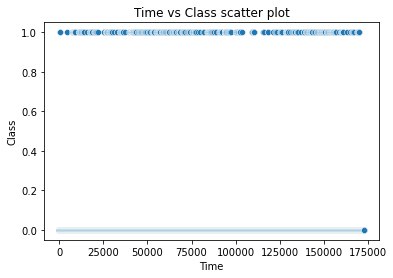

In [19]:
# Creating a scatter plot to observe the distribution of classes with time

sns.scatterplot(data["Time"], data["Class"])
plt.title("Time vs Class scatter plot")
plt.show()


<b>Observation</b><br>
There is not much insight can be drawn from the distribution of the fraudulent transaction based on time as fraudulent/non-fraudulent both transaction are distributed over time.

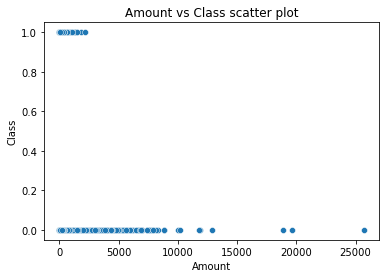

In [20]:
# Creating a scatter plot to observe the distribution of classes with Amount

sns.scatterplot(data["Amount"], data["Class"])
plt.title("Amount vs Class scatter plot")
plt.show()

<b>Observation </b><br>
Clearly low amount transactions are more likely to be fraudulent than high amount transaction.

<AxesSubplot:>

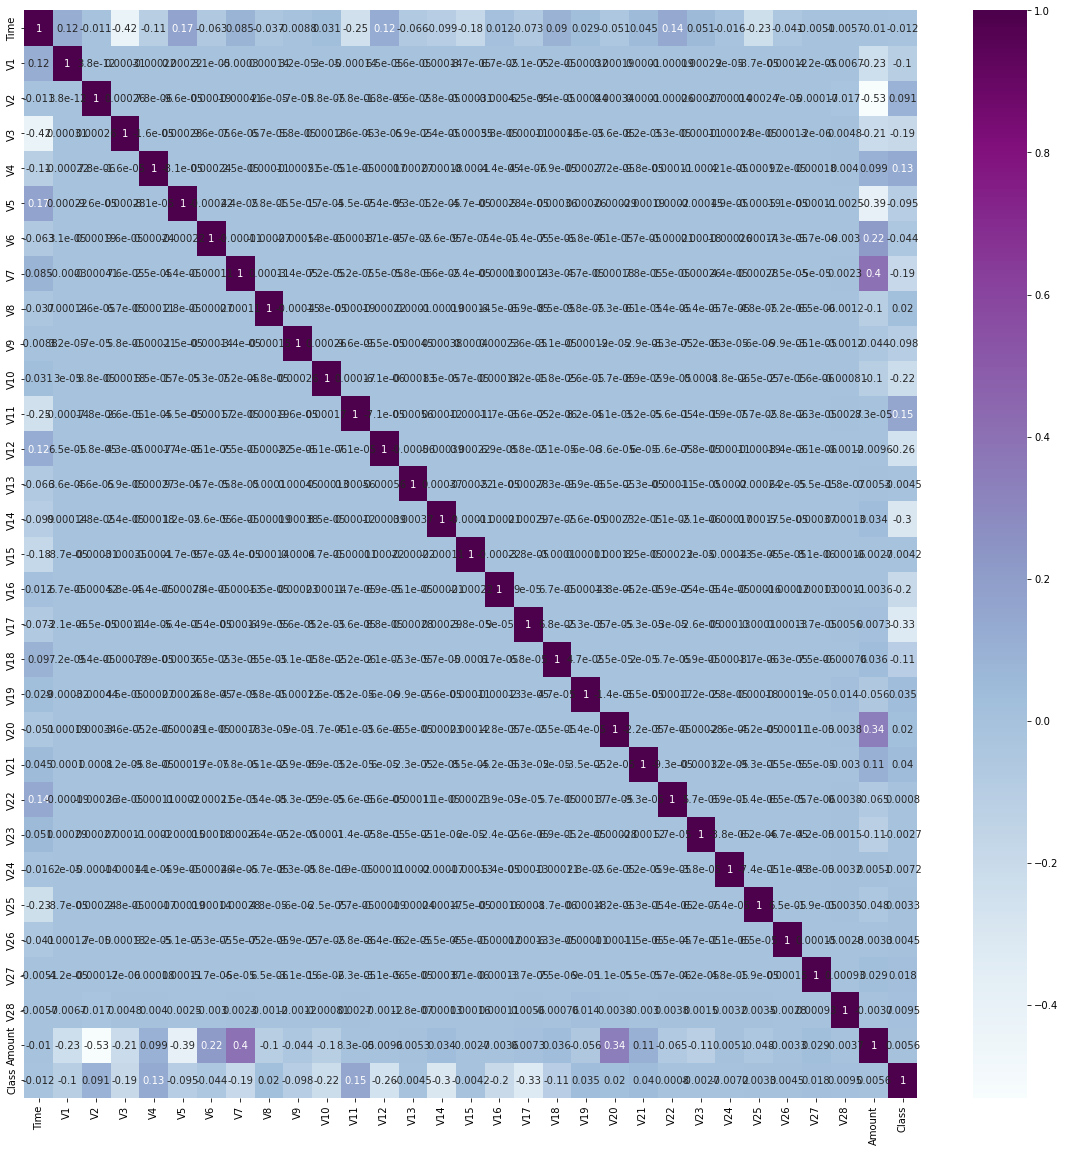

In [27]:
#Correlation heatmap

plt.figure(figsize=(20,20))
sns.heatmap(data.corr(),cmap='BuPu',annot=True)

<b>Observation</b><br>
The heat-map above indicates that there are no high correlation values among the predictor columns. No predictor column has a high correlation value with the Class column either. However there exists a negative correlation among V2 and Amount as well as a positive correlation among V7 and the Amount feature.